## CIFAR - Canadian Institute For Advanced Research

60,000 photos divided into 10 classes

In [2]:
import keras
from keras.datasets import cifar10

import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\zenit\.julia\conda\3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zenit\.julia\conda\3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zenit\.julia\conda\3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zenit\.julia\conda\3\lib\site-packages\tensorflow\python

## Load the data into train and test

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Data description:
50,000 training samples
each image is 32x32 spatial dimension and 3 channels

In [12]:
print("Training predictor shape", X_train.shape, "\nTest predictor shape", X_test.shape, "\nTraining Target shape", y_train.shape, "\nTest Target shape", y_test.shape)

Training predictor shape (50000, 32, 32, 3) 
Test predictor shape (10000, 32, 32, 3) 
Training Target shape (50000, 1) 
Test Target shape (10000, 1)


In [38]:
X_train[49999]

array([[[229, 229, 239],
        [236, 237, 247],
        [234, 236, 247],
        ...,
        [217, 219, 233],
        [221, 223, 234],
        [222, 223, 233]],

       [[222, 221, 229],
        [239, 239, 249],
        [233, 234, 246],
        ...,
        [223, 223, 236],
        [227, 228, 238],
        [210, 211, 220]],

       [[213, 206, 211],
        [234, 232, 239],
        [231, 233, 244],
        ...,
        [220, 220, 232],
        [220, 219, 232],
        [202, 203, 215]],

       ...,

       [[150, 143, 135],
        [140, 135, 127],
        [132, 127, 120],
        ...,
        [224, 222, 218],
        [230, 228, 225],
        [241, 241, 238]],

       [[137, 132, 126],
        [130, 127, 120],
        [125, 121, 115],
        ...,
        [181, 180, 178],
        [202, 201, 198],
        [212, 211, 207]],

       [[122, 119, 114],
        [118, 116, 110],
        [120, 116, 111],
        ...,
        [179, 177, 173],
        [164, 164, 162],
        [163, 163, 161]]

## View the image 

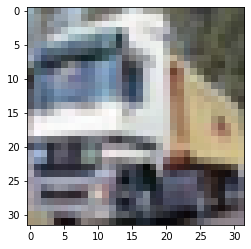

In [39]:
plt.imshow(X_train[1])

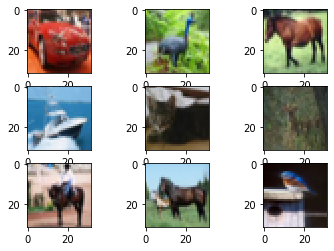

In [40]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i+5])
    
plt.show()

## Load packages for model building

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

## Normalize the pizel values between 0,1

Normalize the inputs because if the inputs vary a lot then it affects weights update. The scale of weights will vary a lot as well if inputs vary. 

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

# Check out normalization
#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)

## Check how a single image appears to the computer

These are nested lists: there are 32 lists, each for one row of image: containing 32 lists (for each column in that row) each containg 3 elements (for each row, each column: i.e., each pixel)

In [17]:
X_train[1]

array([[[0.6039216 , 0.69411767, 0.73333335],
        [0.49411765, 0.5372549 , 0.53333336],
        [0.4117647 , 0.40784314, 0.37254903],
        ...,
        [0.35686275, 0.37254903, 0.2784314 ],
        [0.34117648, 0.3529412 , 0.2784314 ],
        [0.30980393, 0.31764707, 0.27450982]],

       [[0.54901963, 0.627451  , 0.6627451 ],
        [0.5686275 , 0.6       , 0.6039216 ],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.3764706 , 0.3882353 , 0.30588236],
        [0.3019608 , 0.3137255 , 0.24313726],
        [0.2784314 , 0.28627452, 0.23921569]],

       [[0.54901963, 0.60784316, 0.6431373 ],
        [0.54509807, 0.57254905, 0.58431375],
        [0.4509804 , 0.4509804 , 0.4392157 ],
        ...,
        [0.30980393, 0.32156864, 0.2509804 ],
        [0.26666668, 0.27450982, 0.21568628],
        [0.2627451 , 0.27058825, 0.21568628]],

       ...,

       [[0.6862745 , 0.654902  , 0.6509804 ],
        [0.6117647 , 0.6039216 , 0.627451  ],
        [0.6039216 , 0

## Check the label column

In [18]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## One hot encode the target labels

Next, we transform each of the target labels for a given sample into an array of 1s and 0s where the index of the number 1 indicates the digit the the image represents. We do this because otherwise our model would interpret the digit 9 as having a higher priority than the number 3

In [19]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_class = y_test.shape[1]

In [22]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [46]:
num_class

10

## Create your model

1. Use weight regularization methods - to not overfit, force model to use smaller weights, more stable, sparse weight matrix network, more generalized. Weight constraint is just a pre-defined threshold. Can use it instead of weight decays (weight penalty). 
2. Weight penalties encourage but do not require neural networks to have small weights.
3. Weight constraints, such as the L2 norm and maximum norm, can be used to force neural networks to have small weights during training.
4. Weight constraints can improve generalization when used in conjunction with other regularization methods like dropout.

P.S: Large weights in a neural network are a sign of overfitting

Max norm is less aggressive, simply puts an upper bound. It typically improves the performance of stochastic gradient descent training of deep neural nets

Some examples of constraints that could be used include:

> a. Force the vector norm to be 1.0 (e.g. the unit norm)
> b. Limit the maximum size of the vector norm (e.g. the maximum norm)
> c. Limit the minimum and maximum size of the vector norm (e.g. the min_max norm).

Given that weights are small, the hyperparameter too is often a small integer value, such as a value between 1 and 4.

Using a constraint rather than a penalty prevents weights from growing very large no matter how large the proposed weight-update is. This makes it possible to start with a very large learning rate which decays during learning, thus allowing a far more thorough search of the weight-space than methods that start with small weights and use a small learning rate.

Explore the use of other weight constraints, such as a minimum and maximum range, non-negative weights, and more.

You may also choose to use constraints on some weights and not others, such as not using constraints on bias weights in an MLP or not using constraints on recurrent connections in an LSTM

Bias - The bias term determines the distance from the origin the linear decision boundary of the node implements. It is included in every sum, but it does not receive any inputs.

In [76]:
#Instantiate your model
model = Sequential()

#Create first Convolutional layer
layer1 = Conv2D(32, (3,3), input_shape = (32, 32, 3), padding = 'same', 
                 activation = 'relu', kernel_constraint = maxnorm(3))

#Add this layer sequence to the model
model.add(layer1)

#Create a dropout layer function
dropout1 = Dropout(0.2)

model.add(dropout1)

#Create second Convolutional layer
layer2 = Conv2D(32, (3,3), activation = 'relu', padding = 'same', kernel_constraint = maxnorm(3))

#Add the second Conv layer to the model sequence
model.add(layer2)

# Create a max pooling layer
layer3 = MaxPooling2D(pool_size = (2,2))

#Add max pooling layer to the model
model.add(layer3)

#Flatten the output
layer4 = Flatten()

model.add(layer4)

#Make a full dense layer
layer5 = Dense(512, activation = 'relu', kernel_constraint = maxnorm(3))

model.add(layer5)

# Drop values
layer6 = Dropout(0.5)

model.add(layer6)


layer7 = Dense(num_class, activation = 'softmax')
model.add(layer7)

epochs = 4
lrate = 0.02
decay = lrate/epochs

sgd = SGD(lr = lrate, momentum = 0.9, decay = decay, nesterov = False)


#Since we’re trying to predict classes, we use categorical crossentropy as our loss function. 
#We will measure the performance of the model using accuracy.

model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
__________

In [78]:
layer1.get_weights()

[array([[[[-0.11219192,  0.10716294,  0.08982538,  0.13423233,
            0.09395452, -0.10404713, -0.06506576,  0.06800285,
           -0.03781255,  0.08658797, -0.12183592,  0.02665618,
           -0.06311767, -0.05513524, -0.00259149,  0.06665087,
            0.08404475, -0.01371209, -0.01860975,  0.08980396,
            0.06115371,  0.0239951 , -0.11568865, -0.01047158,
            0.12548058, -0.09163179, -0.0671549 ,  0.05685754,
            0.0252959 , -0.061477  , -0.12841153, -0.01175767],
          [ 0.11459522, -0.12370028, -0.07858668, -0.07941733,
           -0.07089714,  0.09659743, -0.08066034,  0.03823756,
            0.03505555,  0.00425503, -0.05690943, -0.01643935,
            0.04235518, -0.00816256,  0.13130845, -0.12624599,
           -0.04746718,  0.04681401,  0.11632444,  0.0597994 ,
            0.02539073,  0.1065661 , -0.10361908,  0.04821576,
            0.04669058,  0.00906484,  0.0693595 , -0.07847299,
            0.07375111,  0.06389685, -0.01877651, -0.0

# Compare Layer 1 weights before and after training

## Before

In [88]:
layer1.get_weights()[0][0][0]

array([[-0.11219192,  0.10716294,  0.08982538,  0.13423233,  0.09395452,
        -0.10404713, -0.06506576,  0.06800285, -0.03781255,  0.08658797,
        -0.12183592,  0.02665618, -0.06311767, -0.05513524, -0.00259149,
         0.06665087,  0.08404475, -0.01371209, -0.01860975,  0.08980396,
         0.06115371,  0.0239951 , -0.11568865, -0.01047158,  0.12548058,
        -0.09163179, -0.0671549 ,  0.05685754,  0.0252959 , -0.061477  ,
        -0.12841153, -0.01175767],
       [ 0.11459522, -0.12370028, -0.07858668, -0.07941733, -0.07089714,
         0.09659743, -0.08066034,  0.03823756,  0.03505555,  0.00425503,
        -0.05690943, -0.01643935,  0.04235518, -0.00816256,  0.13130845,
        -0.12624599, -0.04746718,  0.04681401,  0.11632444,  0.0597994 ,
         0.02539073,  0.1065661 , -0.10361908,  0.04821576,  0.04669058,
         0.00906484,  0.0693595 , -0.07847299,  0.07375111,  0.06389685,
        -0.01877651, -0.03478396],
       [-0.1254669 , -0.02150812, -0.13514285, -0.0970

## After

In [103]:
layer1.get_weights()[0][0][0]

array([[-0.11136943,  0.25548318, -0.19432795,  0.11402513,  0.39184198,
        -0.10356781, -0.16119042,  0.04571508, -0.02072244,  0.03408853,
        -0.12173397,  0.03588555, -0.17668273,  0.27924114, -0.01909275,
         0.04805809,  0.15431696,  0.15349475, -0.07780699,  0.06914344,
         0.05682937,  0.02217084, -0.1331736 , -0.07499895,  0.08864163,
        -0.1426157 , -0.07887597,  0.05250132, -0.03427654, -0.12243081,
        -0.334545  , -0.01890305],
       [ 0.11669713, -0.32924843, -0.32386732, -0.09269222, -0.14740576,
         0.09649231, -0.10982803,  0.01504093,  0.0826292 , -0.0390553 ,
        -0.05870343, -0.00592848, -0.10371166,  0.24079855,  0.11483805,
        -0.14107925,  0.06514327, -0.01195281,  0.05624725,  0.07122061,
         0.02137971,  0.0990123 , -0.10817807,  0.00964815,  0.01635396,
        -0.05867165,  0.05146322, -0.07853323,  0.38020727,  0.00807562,
        -0.10301042, -0.17903093],
       [-0.1249242 , -0.1363189 , -0.33367717, -0.1183

In [89]:
layer1.get_weights()[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [79]:
dropout1.get_weights()

[]

# Compare Layer 2 weights before and after

## Before

In [80]:
layer2.get_weights()[0][0][0][0]

array([-0.05701238, -0.08758241,  0.02061531, -0.09010185,  0.0251801 ,
       -0.08685729,  0.0137036 , -0.05970673, -0.07763033,  0.06969707,
        0.00088055, -0.09449061,  0.09325342, -0.06239972, -0.01026367,
        0.0530825 , -0.04592473,  0.06404959,  0.01254036, -0.05779439,
       -0.10029057, -0.02820313,  0.06254883,  0.06372298, -0.01751598,
       -0.07740453, -0.08675149,  0.04418929,  0.02264473,  0.07781336,
        0.06512789, -0.09407972], dtype=float32)

## After

In [102]:
layer2.get_weights()[0][0][0][0]

array([-0.05664434, -0.08761518,  0.02021814, -0.08967983,  0.02504029,
       -0.08642846,  0.01369239, -0.0593608 , -0.07721626,  0.06943332,
        0.00089093, -0.0939602 ,  0.09285155, -0.06210115, -0.01007376,
        0.05279162, -0.0454438 ,  0.06376098,  0.01239621, -0.05743593,
       -0.0998019 , -0.02783137,  0.06153622,  0.06333051, -0.01727342,
       -0.07679355, -0.08562461,  0.04395558,  0.02245925,  0.07729218,
        0.06395769, -0.09349492], dtype=float32)

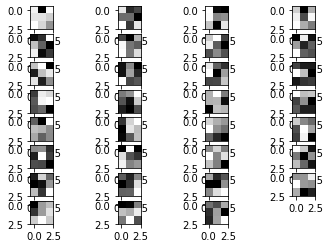

In [81]:
x1w = layer1.get_weights()[0][:,:,0,:]
for i in range(1,32):
  plt.subplot(8,4,i)
  plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

In [82]:
layer1.weights

[<tf.Variable 'conv2d_5/kernel:0' shape=(3, 3, 3, 32) dtype=float32_ref>,
 <tf.Variable 'conv2d_5/bias:0' shape=(32,) dtype=float32_ref>]

In [83]:
layer7.output

<tf.Tensor 'dense_6/Softmax:0' shape=(?, 10) dtype=float32>

# Compare Layer 2 weights before and after training

## Before

In [84]:
layer2.get_weights()[0][0]

array([[[-0.05701238, -0.08758241,  0.02061531, ...,  0.07781336,
          0.06512789, -0.09407972],
        [-0.03775753, -0.04051994,  0.03152528, ..., -0.06662596,
          0.09553783,  0.05593134],
        [ 0.01679262,  0.03487591,  0.09897238, ..., -0.07789224,
          0.08697337, -0.0503853 ],
        ...,
        [-0.06543226, -0.02843624,  0.01274771, ...,  0.07365516,
         -0.09038959,  0.06817479],
        [ 0.00153092, -0.07050453,  0.05938075, ..., -0.08559485,
          0.04326123,  0.09583402],
        [-0.08347061, -0.07904853, -0.05986879, ..., -0.01523045,
         -0.08930529, -0.04516353]],

       [[ 0.06316109,  0.01147981,  0.01374242, ..., -0.04821132,
         -0.00828239,  0.04616597],
        [-0.08917516,  0.06464656, -0.08720234, ...,  0.03917219,
         -0.05100984,  0.09286146],
        [ 0.06171748, -0.08332716, -0.08536324, ..., -0.05034656,
          0.01766536, -0.03880017],
        ...,
        [-0.07012042, -0.04998764, -0.03114196, ..., -

## After

In [100]:
layer2.get_weights()[0][0]

array([[[-0.05664434, -0.08761518,  0.02021814, ...,  0.07729218,
          0.06395769, -0.09349492],
        [-0.04900265, -0.05240753,  0.0241527 , ..., -0.07138503,
          0.01609399,  0.06692731],
        [ 0.01315076, -0.0605198 ,  0.1070675 , ..., -0.07932245,
          0.11701192, -0.09552355],
        ...,
        [-0.09269036, -0.01604217,  0.00121037, ...,  0.0488391 ,
         -0.09752761,  0.05349865],
        [-0.00746075, -0.16203927,  0.05794831, ..., -0.0931968 ,
          0.01902437,  0.04337129],
        [-0.0907164 , -0.12337177, -0.07294831, ..., -0.0288226 ,
         -0.20383197, -0.04559672]],

       [[ 0.06274468,  0.0106897 ,  0.01341904, ..., -0.04764152,
         -0.00894815,  0.04593467],
        [-0.0927486 ,  0.07853726, -0.08251979, ...,  0.03004363,
         -0.03063309,  0.06777431],
        [ 0.0537364 , -0.17396198, -0.0774583 , ..., -0.05212143,
          0.01645187, -0.08852895],
        ...,
        [-0.11555195, -0.05226697, -0.0370946 , ..., -

# Check layer 5 bias weights before and after training

## Before

In [91]:
layer5.get_weights()[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## After

In [99]:
layer5.get_weights()[1]

array([-1.40353041e-02,  2.77744532e-02,  5.41415624e-03,  3.86766368e-03,
       -8.32348131e-03, -1.51134860e-02,  1.20116295e-02,  9.12668358e-04,
       -3.40944007e-02, -2.90977303e-02,  6.74744463e-03,  2.27369852e-02,
       -1.83783453e-02, -1.07651604e-02, -3.80299077e-03, -2.25221198e-02,
        1.53643973e-02,  5.28498460e-03,  5.46649471e-02, -2.34519807e-03,
        1.49461403e-02,  2.52368283e-02,  1.47487521e-02,  4.67123277e-02,
       -4.00565704e-03,  3.74795645e-02, -1.57522894e-02, -2.09537372e-02,
        1.94596704e-02,  1.55168306e-02,  7.45296702e-02, -1.19805569e-02,
       -1.57975126e-02,  3.85496253e-03, -1.17458859e-02,  2.32782532e-02,
       -8.62979330e-03, -1.01524238e-02, -6.88519515e-03,  2.77626645e-02,
       -1.06589096e-02, -9.44494549e-03, -9.48097929e-03, -1.00122392e-02,
       -1.10896677e-02, -3.04628559e-03,  3.22205536e-02, -3.89374583e-03,
        1.12206955e-02,  1.77933220e-02,  5.51410019e-02, -1.43982386e-02,
        1.83653906e-02, -

In [90]:
len(layer5.get_weights())

2

In [93]:
layer5.input_shape

(None, 8192)

In [95]:
layer5.output_shape

(None, 512)

In [96]:
layer5.output

<tf.Tensor 'dense_5/Relu:0' shape=(?, 512) dtype=float32>

# Check the output of each layer of the CNN model

In [104]:
model.layers[0].output

<tf.Tensor 'conv2d_5/Relu:0' shape=(?, 32, 32, 32) dtype=float32>

In [105]:
model.layers[1].output

<tf.Tensor 'dropout_5/cond/Merge:0' shape=(?, 32, 32, 32) dtype=float32>

In [106]:
model.layers[2].output

<tf.Tensor 'conv2d_6/Relu:0' shape=(?, 32, 32, 32) dtype=float32>

In [107]:
model.layers[3].output

<tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(?, 16, 16, 32) dtype=float32>

In [108]:
model.layers[4].output

<tf.Tensor 'flatten_3/Reshape:0' shape=(?, ?) dtype=float32>

In [109]:
model.layers[5].output

<tf.Tensor 'dense_5/Relu:0' shape=(?, 512) dtype=float32>

In [110]:
model.layers[6].output

<tf.Tensor 'dropout_6/cond/Merge:0' shape=(?, 512) dtype=float32>

In [111]:
model.layers[7].output

<tf.Tensor 'dense_6/Softmax:0' shape=(?, 10) dtype=float32>

In [94]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = 32)

scores = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.2f%%'%(scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 171s - loss: 1.7277 - acc: 0.3780 - val_loss: 1.4537 - val_acc: 0.4848
Epoch 2/4
50000/50000 [==============================] - 174s - loss: 1.4254 - acc: 0.4915 - val_loss: 1.3245 - val_acc: 0.5364
Epoch 3/4
50000/50000 [==============================] - 177s - loss: 1.3320 - acc: 0.5229 - val_loss: 1.2659 - val_acc: 0.5474
Epoch 4/4
50000/50000 [==============================] - 179s - loss: 1.2814 - acc: 0.5419 - val_loss: 1.2346 - val_acc: 0.5654
Accuracy: 56.54%


In [50]:
keras.backend.backend()

'tensorflow'

# MNIST digit recognition

In [51]:
# # import data
# from keras.datasets import mnist

In [52]:
# # Train test split

# (X_train, y_train), (X_test, y_test) = mnist.load_data()

In [53]:
# from random import randint
# from matplotlib import pyplot

# %matplotlib inline

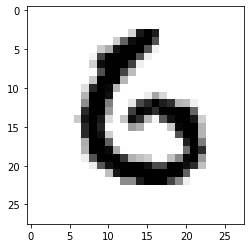

In [66]:
# # Visually inspect your data
# pyplot.imshow(X_train[randint(0, X_train.shape[0])], cmap = 'gray_r')

In [68]:
# # Munge data
# # Transform from matrix to vector, cast and normalize:

# image_size = 28*28
# X_train = X_train.reshape(X_train.shape[0], image_size)
# X_train = X_train.astype('float32')
# X_train = X_train/255

# X_test = X_test.reshape(X_test.shape[0], image_size)
# X_test = X_test.astype('float32')
# X_test = X_test/255

In [69]:
# # Convert class vectors to binary class matrices

# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

In [70]:
# # Import the most common type of neural network

# from keras.models import Sequential

# #We have the class of Sequential

In [78]:
# #Define model instance

# model = Sequential()

# # most common type of layer is Dense layer, fully connected

# from keras.layers import Dense
# # Gives us a bipartite graph which is fully connected - means every node in one layer is fully connected 
# # to all the nodes in the other layer, we dont know what will happen to our data so this gives flexibility

In [79]:
# # Define input layer
# # Nodes are called units

# layer_input = Dense(units = 512, 
#                    activation = 'sigmoid', 
#                    input_shape = (image_size,))

# # Once we create layer, then we need to add it to the model

# # We have general instance called model and there is a method called add

# model.add(layer_input)

# # or, model.add(Dense(units = 512, activation = 'sigmoid', input_size = (image_size, ))

In [80]:
# # Define output layer
# # Softmax allows to map NN activation to categories

# layer_output= Dense(units = 10, 
#                    activation = 'softmax')

# model.add(layer_output)

In [81]:
# # Print summary of model architecture
# model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [82]:
# Add training parameters to model architecture

# model.compile(loss = 'categorical_crossentropy', 
#              optimizer = 'sgd',
#              metrics = ['accuracy'])


In [85]:
# training = model.fit(X_train, y_train, epochs = 5, verbose= True, validation_split = 0.01)

Train on 59400 samples, validate on 600 samples
Epoch 1/5
59400/59400 [==============================] - 5s - loss: 1.3176 - acc: 0.7118 - val_loss: 0.6518 - val_acc: 0.8917
Epoch 2/5
59400/59400 [==============================] - 5s - loss: 0.6240 - acc: 0.8559 - val_loss: 0.4129 - val_acc: 0.9183
Epoch 3/5
59400/59400 [==============================] - 7s - loss: 0.4825 - acc: 0.8753 - val_loss: 0.3619 - val_acc: 0.9183
Epoch 4/5
59400/59400 [==============================] - 7s - loss: 0.4239 - acc: 0.8851 - val_loss: 0.3240 - val_acc: 0.9267
Epoch 5/5
59400/59400 [==============================] - 6s - loss: 0.3915 - acc: 0.8919 - val_loss: 0.3086 - val_acc: 0.9283
